In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class StaticAllocation:
    ###
    # finds allocation of capital and labor across sectors
    ###
    
    def __init__(self,
                 α_KA    = 0.15,
                 α_LA    = 0.55,
                 α_KM    = 0.6, 
                 α_LM    = 0.4,
                 X_A     = 1,
                 X_M     = 1,
                 K       = 1,
                 L       = 1,
                 η_A     = 0.15,
                 η_M     = 0.85,
                 γ_A     = 0.1,
                 s       = 0.3,
                 τ_R     = 0,
                 τ_W     = 0,
                 ):
        
        self.α_KA, self.α_LA = α_KA, α_LA
        self.α_KM, self.α_LM = α_KM, α_LM
        self.X_A,  self.X_M  = X_A , X_M
        self.L,    self.K    = L   , K
        self.η_A,  self.η_M  = η_A , η_M
        self.γ_A,  self.s    = γ_A   , s
        self.τ_R,  self.τ_W  = τ_R , τ_W
    
    def Y_A(self, κ):
        ###
        # the production function for sector A
        ###
        X_A, α_KA, α_LA = self.X_A, self.α_KA, self.α_LA
        K, L            = self.K, self.L
        
        λ = self.λ(κ)
        
        K_A = (1 - κ) * K 
        L_A = (1 - λ) * L
        
        Y_A = X_A * (K_A ** α_KA) * (L_A ** α_LA)
        return Y_A
    
    
    def Y_M(self, κ):
        ###
        # the production function for sector M
        ###
        X_M, α_KM, α_LM = self.X_M, self.α_KM, self.α_LM
        K, L            = self.K, self.L
        
        λ = self.λ(κ)
        
        K_M = κ * K 
        L_M = λ * L
        
        Y_M = X_M * (K_M ** α_KM) * (L_M ** α_LM)
        return Y_M
    
    
    def λ(self, κ):
        ###
        # finds λ given κ
        ###
        α_KA, α_LA = self.α_KA, self.α_LA
        α_KM, α_LM = self.α_KM, self.α_LM
        η_A , η_M  = self.η_A , self.η_M
        τ_R , τ_W  = self.τ_R , self.τ_W
        
        temp = (α_LA / α_LM) * (α_KM / α_KA) * ((1 + τ_W) / (1 + τ_R)) * ((1 - κ) / κ)
        λ = (1 + temp) ** (-1)
        return λ
    
    
    def solve_κ(self):
        ###
        # equation for κ
        ###
        α_KA      = self.α_KA
        α_KM      = self.α_KM
        η_A, η_M  = self.η_A, self.η_M
        γ_A       = self.γ_A
        τ_R       = self.τ_R
        
        const = (η_M / η_A) * (α_KM / α_KA) * (1 / (1 + τ_R))
        
        func = lambda κ: const * (1 - (γ_A / self.Y_A(κ))) * ((1 - κ) / κ) - 1
        
        κ_initial_guess = 0.1
        κ = fsolve(func, κ_initial_guess)[0]
        
        return κ
    
    def solve_λ(self):
        ###
        # finds equilibrium labor allocation
        ###
        
        κ = self.solve_κ()
        λ = self.λ(κ)
        
        return λ
    
    
    def solve_Y_A(self):
        ###
        # finds equilibrium labor allocation
        ###
        
        κ = self.solve_κ()
        Y_A = self.Y_A(κ)
        
        return Y_A
    
    
    def solve_Y_M(self):
        ###
        # finds equilibrium labor allocation
        ###
        
        κ = self.solve_κ()
        Y_M = self.Y_M(κ)
        
        return Y_M

In [3]:
allocation = StaticAllocation()

In [4]:
allocation.solve_κ()

0.93926210408301

In [5]:
allocation.solve_λ()

0.7376478119639359

In [10]:
allocation.solve_Y_M()

0.8527303170151312

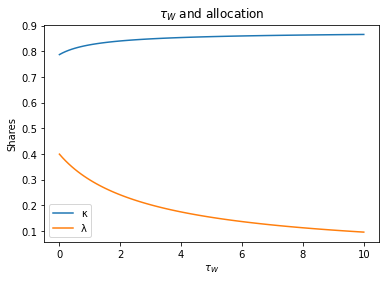

In [7]:
fig, ax = plt.subplots()
τ_Ws    = np.linspace(1e-2, 10, 100)
κs      = np.zeros_like(τ_Ws)
λs      = np.zeros_like(τ_Ws)
for i, τ_W in enumerate(τ_Ws):
    alloc = StaticAllocation(τ_W = τ_W, K = 0.1, L = 0.1)
    κs[i] = alloc.solve_κ()
    λs[i] = alloc.solve_λ()
ax.plot(τ_Ws, κs, label = 'κ')
ax.plot(τ_Ws, λs, label = 'λ')
ax.legend()
ax.set_xlabel(r'$\tau_W$'.format())
ax.set_ylabel(r'Shares'.format())
ax.set_title(r'$\tau_W$ and allocation'.format())
plt.show()

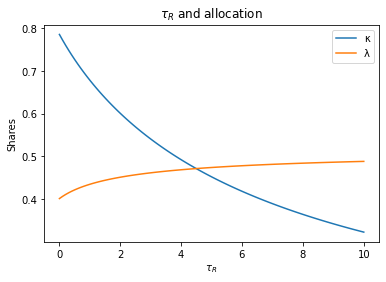

In [8]:
fig, ax = plt.subplots()
τ_Rs    = np.linspace(1e-2, 10, 100)
κs      = np.zeros_like(τ_Rs)
λs      = np.zeros_like(τ_Rs)
for i, τ_R in enumerate(τ_Rs):
    alloc = StaticAllocation(τ_R = τ_R, K = 0.1, L = 0.1)
    κs[i] = alloc.solve_κ()
    λs[i] = alloc.solve_λ()
ax.plot(τ_Rs, κs, label = 'κ')
ax.plot(τ_Rs, λs, label = 'λ')
ax.legend()
ax.set_xlabel(r'$\tau_R$'.format())
ax.set_ylabel(r'Shares'.format())
ax.set_title(r'$\tau_R$ and allocation'.format())
plt.show()

In [9]:
κs

array([0.7851368 , 0.77230683, 0.76003973, 0.74828357, 0.73699458,
       0.72613532, 0.71567344, 0.70558063, 0.69583195, 0.68640521,
       0.67728059, 0.66844025, 0.65986803, 0.65154926, 0.64347054,
       0.63561959, 0.62798512, 0.62055671, 0.61332472, 0.60628021,
       0.59941486, 0.59272092, 0.58619115, 0.57981875, 0.57359739,
       0.56752107, 0.56158418, 0.55578143, 0.55010782, 0.54455862,
       0.53912937, 0.53381582, 0.52861398, 0.52352002, 0.51853032,
       0.51364145, 0.5088501 , 0.50415317, 0.49954767, 0.49503074,
       0.49059967, 0.48625186, 0.48198481, 0.47779615, 0.4736836 ,
       0.46964495, 0.46567813, 0.4617811 , 0.45795193, 0.45418878,
       0.45048983, 0.44685339, 0.44327778, 0.43976143, 0.43630278,
       0.43290037, 0.42955276, 0.42625859, 0.42301651, 0.41982525,
       0.41668357, 0.41359028, 0.41054421, 0.40754425, 0.40458932,
       0.40167838, 0.39881039, 0.3959844 , 0.39319945, 0.39045461,
       0.387749  , 0.38508175, 0.38245202, 0.379859  , 0.37730